# Question 1.
 Using Python, complete the prediction task outlined in Part B of the case.\
In particular, 
develop a model that allows you to predict the probability of employees at the Lyon 
facility accepting an RCC if it is offered to them.\
Make sure that your code prints out the predicted probability for each employee (e.g., as a list).\
What are the most important factors in determining whether an employee will accept an RCC?

In [1]:
import numpy as np

In [2]:
#load libraries
import numpy as np ;import pandas as pd 
import matplotlib.pyplot as plt; import seaborn as sns; sns.set()
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

#metrics
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

### Loading data for previous attrition

In [3]:
df = pd.read_csv('employee_attrition_previous_closure (1).csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [4]:
# data types of features 
df.dtypes.value_counts()

int64      23
object      9
float64     3
dtype: int64

In [5]:
print('Total Null values:',df.isnull().sum().sum(),'\n')

for colName in df.columns:
    nanVal = df[colName].isna().sum()
    if nanVal > 0:
        print(colName,':',nanVal)

Total Null values: 268 

Age : 136
BusinessTravel : 5
DailyRate : 27
DistanceFromHome : 95
MaritalStatus : 5


In [6]:
df[df['BusinessTravel'].isna()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
171,45.0,No,NaN,950.0,Research & Development,28.0,3,Technical Degree,1,1546,...,4,80,1,8,3,3,5,4,0,3
255,24.0,No,NaN,1206.0,Research & Development,17.0,1,Medical,1,1009,...,2,80,2,5,6,3,4,2,3,2
260,29.0,No,NaN,991.0,Sales,NaN,3,Medical,1,1669,...,2,80,1,10,3,2,10,0,0,9
333,32.0,No,NaN,1401.0,Sales,4.0,2,Life Sciences,1,330,...,1,80,1,6,5,3,4,3,1,2
339,40.0,No,NaN,616.0,Research & Development,2.0,2,Life Sciences,1,1802,...,4,80,1,7,5,2,4,3,0,2


### Fill NaN cells

In [7]:
# Age column has the most null value so,
# filling nan with mean of column Age
AgeNanIndex = df[df['Age'].isna()].index
df.loc[AgeNanIndex,'Age'] = df['Age'].mean()

DistNanIndex = df[df['DistanceFromHome'].isna()].index
df.loc[DistNanIndex,'DistanceFromHome'] = df['DistanceFromHome'].mean()

DailyNanIndex = df[df['DailyRate'].isna()].index
df.loc[DailyNanIndex,'DailyRate'] = df['DailyRate'].mean()

In [8]:
# Information on dataset
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} attributes\n')

The dataset has 1029 rows and 35 attributes



### Corelation

In [9]:
# unique values of target column
df['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df['Attrition'].value_counts().index

Index(['No', 'Yes'], dtype='object')

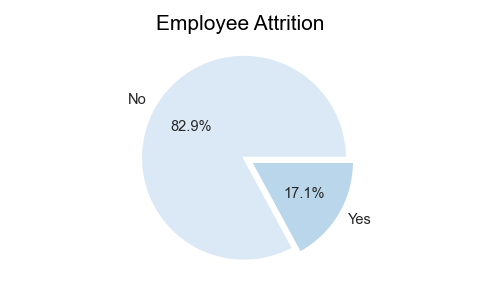

In [11]:
colr = sns.color_palette("Blues")

fig, ax1 = plt.subplots(1, 1, figsize=(4, 2), dpi=150)
fig.suptitle('Employee Attrition', fontsize=10, color = 'black')
explode = [0,0.08]

ax1.pie(df['Attrition'].value_counts().values, labels = df['Attrition'].value_counts().index,
        explode=explode, colors=colr, autopct='%1.1f%%',textprops={'fontsize': 7}) 
        
ax1.axis('equal')

plt.show()

**Observation**
The quantity of data of employee having Attrition is less compared to employees whoch do not have Attrition. 

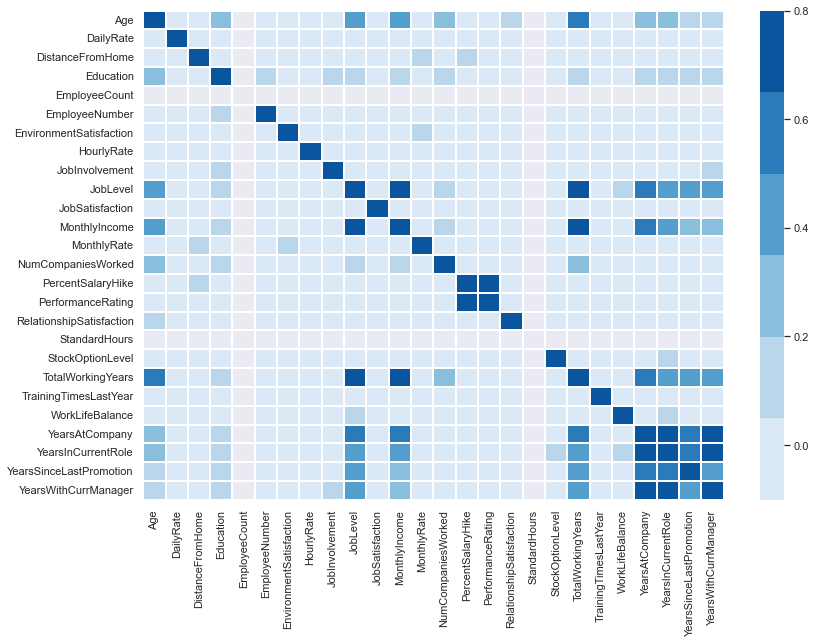

In [12]:
colr = sns.color_palette("Blues",)

plt.figure(figsize=(13,9))
sns.heatmap(df.corr(),vmax=0.8,linewidth=0.1,cmap=colr)
plt.show()

* TotalWorkingYears have positive relationship with JobLevel, and MonthlyIncome.
* Bit of positive relationship can be seen between YearsAtCompany with YearsInCurrentRole, and YearsWithCurrentManager.
* And couple of other columns like PerformanceRating & PercentSalaryHike are interlinked.

## Catagorical columns

In [13]:
print('Total Null values:',df.isnull().sum().sum(),'\n')

for colName in df.columns:
    nanVal = df[colName].isna().sum()
    if nanVal > 0:
        print(colName,':',nanVal)

Total Null values: 10 

BusinessTravel : 5
MaritalStatus : 5


In [19]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.000000,No,Travel_Rarely,1126.0,Research & Development,1.000000,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.000000,No,Travel_Rarely,216.0,Research & Development,6.000000,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.000000,Yes,Travel_Rarely,337.0,Sales,7.000000,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.000000,No,Travel_Frequently,1246.0,Human Resources,9.930407,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.000000,No,Travel_Rarely,994.0,Research & Development,7.000000,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,37.930571,No,Travel_Rarely,750.0,Research & Development,28.000000,3,Life Sciences,1,1596,...,4,80,2,10,3,2,10,9,6,8
1025,41.000000,No,Travel_Rarely,447.0,Research & Development,9.930407,3,Life Sciences,1,1814,...,1,80,0,11,3,1,3,2,1,2
1026,22.000000,Yes,Travel_Frequently,1256.0,Research & Development,9.930407,4,Life Sciences,1,1203,...,2,80,1,1,5,3,0,0,0,0
1027,29.000000,No,Travel_Rarely,1378.0,Research & Development,13.000000,2,Other,1,2053,...,1,80,1,10,2,3,4,3,0,3


In [25]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [26]:
df['JobRole']

0               Research Director
1          Manufacturing Director
2            Sales Representative
3                         Manager
4       Healthcare Representative
                  ...            
1024        Laboratory Technician
1025    Healthcare Representative
1026           Research Scientist
1027        Laboratory Technician
1028                      Manager
Name: JobRole, Length: 1029, dtype: object

In [43]:
cata_nan_index = df[df['BusinessTravel'].isna()].index
df[df['BusinessTravel'].isna()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
171,45.0,No,NaN,950.0,Research & Development,28.000000,3,Technical Degree,1,1546,...,4,80,1,8,3,3,5,4,0,3
255,24.0,No,NaN,1206.0,Research & Development,17.000000,1,Medical,1,1009,...,2,80,2,5,6,3,4,2,3,2
260,29.0,No,NaN,991.0,Sales,9.930407,3,Medical,1,1669,...,2,80,1,10,3,2,10,0,0,9
333,32.0,No,NaN,1401.0,Sales,4.000000,2,Life Sciences,1,330,...,1,80,1,6,5,3,4,3,1,2
339,40.0,No,NaN,616.0,Research & Development,2.000000,2,Life Sciences,1,1802,...,4,80,1,7,5,2,4,3,0,2


In [62]:
travel_freq_jobrole = df[['JobRole','BusinessTravel']][(df['Department'] == 'Research & Development') | (df['Department'] == 'Sales')].value_counts()


In [63]:
travel_freq_jobrole

JobRole                    BusinessTravel   
Research Scientist         Travel_Rarely        153
Sales Executive            Travel_Rarely        150
Laboratory Technician      Travel_Rarely        127
Manufacturing Director     Travel_Rarely         64
Healthcare Representative  Travel_Rarely         60
Manager                    Travel_Rarely         49
Research Director          Travel_Rarely         48
Research Scientist         Travel_Frequently     45
Sales Representative       Travel_Rarely         42
Sales Executive            Travel_Frequently     39
Laboratory Technician      Travel_Frequently     32
Sales Executive            Non-Travel            27
Manufacturing Director     Travel_Frequently     22
Sales Representative       Travel_Frequently     19
Laboratory Technician      Non-Travel            19
Healthcare Representative  Travel_Frequently     17
Research Scientist         Non-Travel            15
Healthcare Representative  Non-Travel            12
Research Director  

# code to fill cata nan

In [67]:
for ind in cata_nan_index:
    curr_nan_row = df.loc[ind]
    curr_dep = curr_nan_row['JobRole']
    best_nan_match = travel_freq_jobrole[curr_dep].index[0]
    df.loc[ind,'BusinessTravel'] = best_nan_match
    

In [68]:
print('Total Null values:',df.isnull().sum().sum(),'\n')

for colName in df.columns:
    nanVal = df[colName].isna().sum()
    if nanVal > 0:
        print(colName,':',nanVal)

Total Null values: 5 

MaritalStatus : 5


In [37]:
a1 = df[['JobRole','BusinessTravel']][df['Department'] == 'Research & Development' & df['Department'] == 'Sales'].value_counts()
a2 = df[df['Department'] == 'Research & Development']

display(a1,a2)

JobRole                    BusinessTravel   
Research Scientist         Travel_Rarely        153
Laboratory Technician      Travel_Rarely        127
Manufacturing Director     Travel_Rarely         64
Healthcare Representative  Travel_Rarely         60
Research Director          Travel_Rarely         48
Research Scientist         Travel_Frequently     45
Laboratory Technician      Travel_Frequently     32
Manager                    Travel_Rarely         24
Manufacturing Director     Travel_Frequently     22
Laboratory Technician      Non-Travel            19
Healthcare Representative  Travel_Frequently     17
Research Scientist         Non-Travel            15
Healthcare Representative  Non-Travel            12
Research Director          Travel_Frequently     10
Manufacturing Director     Non-Travel             8
Manager                    Travel_Frequently      7
                           Non-Travel             6
Research Director          Non-Travel             4
dtype: int64

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.000000,No,Travel_Rarely,1126.0,Research & Development,1.000000,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.000000,No,Travel_Rarely,216.0,Research & Development,6.000000,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
4,52.000000,No,Travel_Rarely,994.0,Research & Development,7.000000,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0
5,33.000000,Yes,Travel_Rarely,1277.0,Research & Development,15.000000,1,Medical,1,582,...,4,80,0,15,2,4,7,6,7,7
6,47.000000,No,Travel_Rarely,1001.0,Research & Development,4.000000,3,Life Sciences,1,1827,...,3,80,1,28,4,3,22,11,14,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,33.000000,No,Travel_Rarely,589.0,Research & Development,28.000000,4,Life Sciences,1,1549,...,2,80,1,15,3,3,15,14,5,7
1024,37.930571,No,Travel_Rarely,750.0,Research & Development,28.000000,3,Life Sciences,1,1596,...,4,80,2,10,3,2,10,9,6,8
1025,41.000000,No,Travel_Rarely,447.0,Research & Development,9.930407,3,Life Sciences,1,1814,...,1,80,0,11,3,1,3,2,1,2
1026,22.000000,Yes,Travel_Frequently,1256.0,Research & Development,9.930407,4,Life Sciences,1,1203,...,2,80,1,1,5,3,0,0,0,0


In [23]:
df['BusinessTravel'][df['Department'] == 'Sales'].value_counts()

Travel_Rarely        217
Travel_Frequently     60
Non-Travel            32
Name: BusinessTravel, dtype: int64

In [16]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', nan],
      dtype=object)

In [17]:
df['BusinessTravel'].value_counts()

Travel_Rarely        723
Travel_Frequently    199
Non-Travel           102
Name: BusinessTravel, dtype: int64

# Filling MaritalStatus nan values

In [90]:
marital_nan_index = df[df['MaritalStatus'].isna()].index

# Filing nan for MaritalStatus

In [91]:
df.loc[marital_nan_index,'MaritalStatus'] = 'Married'

In [92]:
print('Total Null values:',df.isnull().sum().sum(),'\n')

for colName in df.columns:
    nanVal = df[colName].isna().sum()
    if nanVal > 0:
        print(colName,':',nanVal)

Total Null values: 0 



In [86]:
df[df['MaritalStatus'].isna()][['WorkLifeBalance','Gender']]

,WorkLifeBalance,Gender
10,2,Male
89,2,Female
105,3,Female
107,3,Female
150,2,Male


In [73]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [75]:
df['WorkLifeBalance']

0       2
1       3
2       3
3       3
4       3
       ..
1024    2
1025    1
1026    3
1027    3
1028    3
Name: WorkLifeBalance, Length: 1029, dtype: int64

In [87]:
df[['Gender','WorkLifeBalance','MaritalStatus']].value_counts()

Gender  WorkLifeBalance  MaritalStatus
Male    3                Married          164
Female  3                Married          129
Male    3                Single           117
Female  3                Single            83
Male    3                Divorced          80
        2                Married           62
Female  3                Divorced          51
        2                Married           47
Male    2                Single            46
                         Divorced          44
        4                Married           35
Female  2                Single            27
Male    4                Divorced          22
Female  2                Divorced          21
        4                Single            17
Male    1                Married           17
                         Single            12
        4                Single            11
Female  1                Married           10
        4                Married           10
        1                Single          

In [357]:
df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,No,Travel_Rarely,Research & Development,Medical,Male,Research Director,Divorced,Y,No
1,No,Travel_Rarely,Research & Development,Medical,Male,Manufacturing Director,Divorced,Y,No
2,Yes,Travel_Rarely,Sales,Marketing,Male,Sales Representative,Single,Y,No
3,No,Travel_Frequently,Human Resources,Medical,Male,Manager,Married,Y,No
4,No,Travel_Rarely,Research & Development,Life Sciences,Male,Healthcare Representative,Single,Y,No


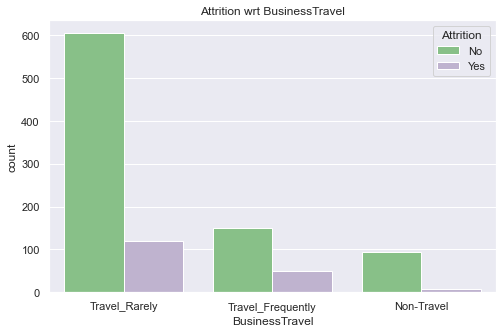

In [358]:

plt.figure(figsize=(8,5))
sns.countplot(x='BusinessTravel',hue='Attrition', data=df, palette='Accent' )
plt.title("Attrition wrt BusinessTravel")
plt.show()

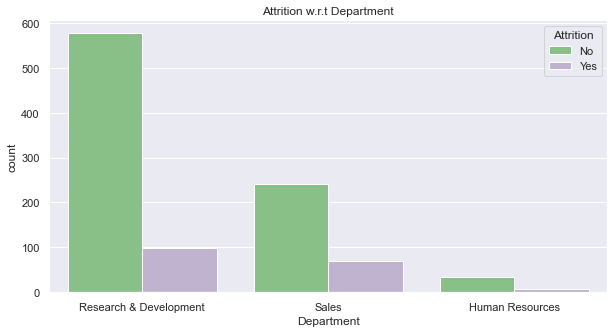

In [359]:
# Department wrt Attrition
plt.figure(figsize=(10,5))
sns.countplot(x='Department',hue='Attrition', data=df, palette='Accent')
plt.title("Attrition w.r.t Department")
plt.show()

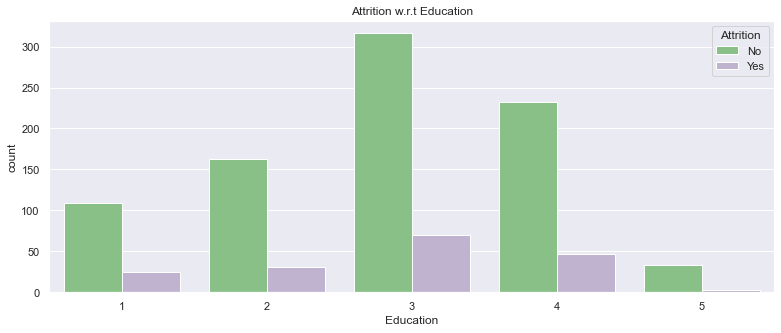

In [360]:
# Department wrt Attrition
plt.figure(figsize=(13,5))
sns.countplot(x='Education',hue='Attrition', data=df, palette='Accent')
plt.title("Attrition w.r.t Education")
plt.show()

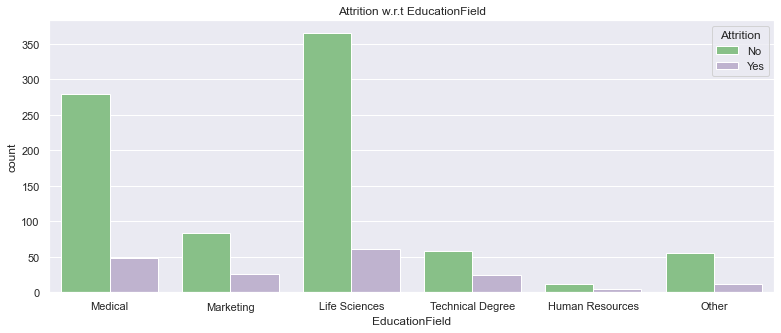

In [361]:
# Department wrt Attrition
plt.figure(figsize=(13,5))
sns.countplot(x='EducationField',hue='Attrition', data=df, palette='Accent')
plt.title("Attrition w.r.t EducationField")
plt.show()

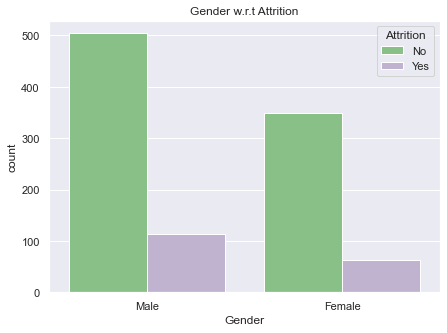

In [362]:
# male of female employes Attriate
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',hue='Attrition', data=df, palette='Accent')
plt.title("Gender w.r.t Attrition")
plt.show()

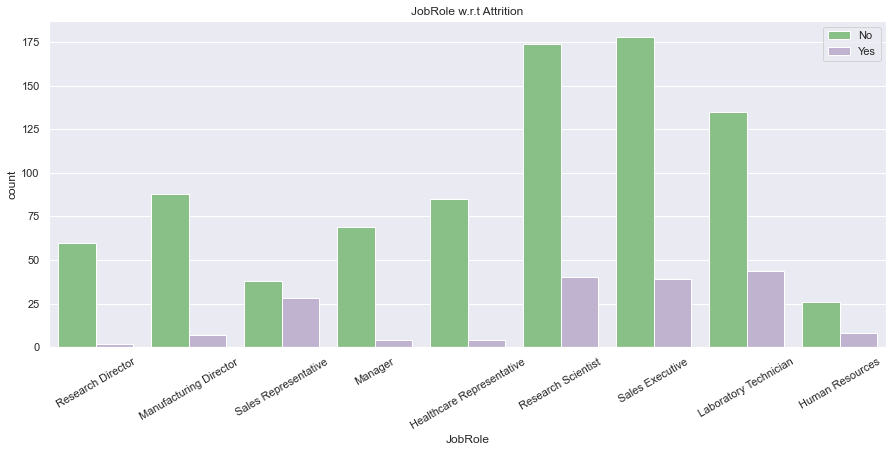

In [363]:
# at which post most people are leaving the jobs
# JobRole
plt.figure(figsize=(15,6))
sns.countplot(x='JobRole',hue='Attrition', data=df, palette='Accent')
plt.title("JobRole w.r.t Attrition")
plt.legend(loc='best')
plt.xticks(rotation=30)
plt.show()

In [364]:
df['JobRole'].value_counts()

Sales Executive              217
Research Scientist           214
Laboratory Technician        179
Manufacturing Director        95
Healthcare Representative     89
Manager                       73
Sales Representative          66
Research Director             62
Human Resources               34
Name: JobRole, dtype: int64

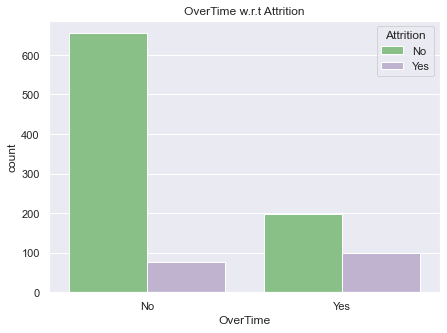

In [365]:
plt.figure(figsize=(7,5))
sns.countplot(x='OverTime',hue='Attrition', data=df, palette='Accent')
plt.title("OverTime w.r.t Attrition")
plt.show()

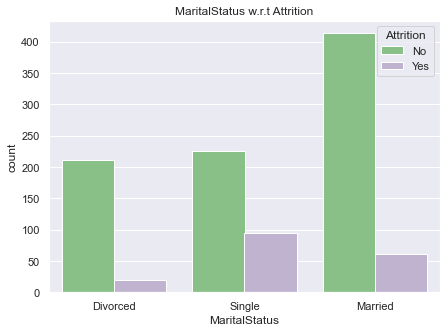

In [366]:
plt.figure(figsize=(7,5))
sns.countplot(x='MaritalStatus',hue='Attrition', data=df, palette='Accent')
plt.title("MaritalStatus w.r.t Attrition")
plt.show()

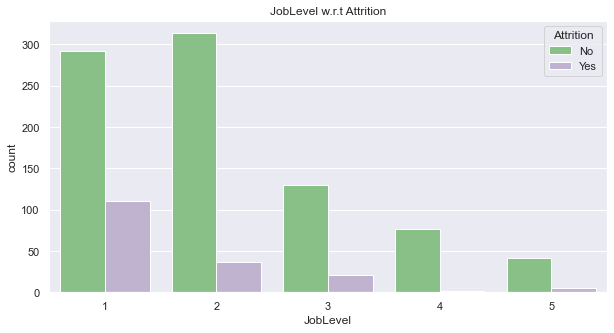

In [367]:
# JobLevel can have some effect on Attrition of Employees
plt.figure(figsize=(10,5))
sns.countplot(x='JobLevel',hue='Attrition',data=df, palette='Accent')
plt.title("JobLevel w.r.t Attrition")
plt.show()

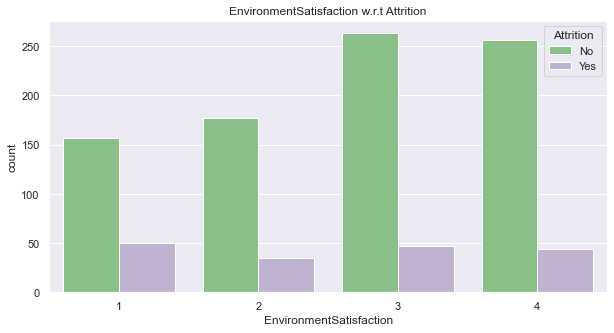

In [368]:
# JobLevel can have some effect on Attrition of Employees
plt.figure(figsize=(10,5))
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=df, palette='Accent')
plt.title("EnvironmentSatisfaction w.r.t Attrition")
plt.show()

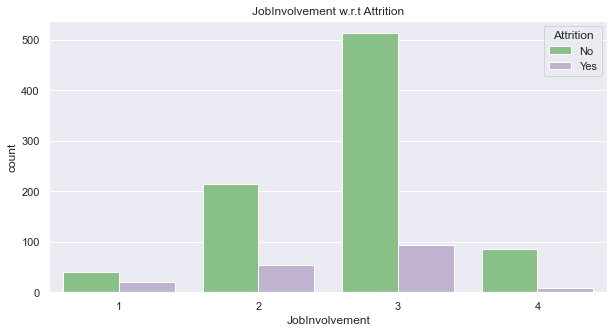

In [369]:
# JobLevel can have some effect on Attrition of Employees
plt.figure(figsize=(10,5))
sns.countplot(x='JobInvolvement',hue='Attrition',data=df, palette='Accent')
plt.title("JobInvolvement w.r.t Attrition")
plt.show()

In [370]:
# gender frequency wrt overtime
pd.crosstab(df['OverTime'], df['Gender'])

Gender,Female,Male
OverTime,,
No,286,445
Yes,126,172


### One-hot encoding

In [95]:
np.where(df['Attrition'] == "Yes", 1, 0)

array([0, 0, 1, ..., 1, 0, 0])

In [97]:
from sklearn.preprocessing import OneHotEncoder

In [106]:
one = OneHotEncoder()
one.fit_transform(df['BusinessTravel'].values.reshape(-1, 1)).toarray()


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [108]:
pd.get_dummies(df['BusinessTravel'], columns = ['BusinessTravel'])

,Non-Travel,Travel_Frequently,Travel_Rarely
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
1024,0,0,1
1025,0,0,1
1026,0,1,0
1027,0,0,1


In [96]:
pd.factorize(df['BusinessTravel'])

(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 Index(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype='object'))

In [109]:
# One-hot encoding
df['Attrition'] = np.where(df['Attrition'] == "Yes",1,0)
df['OverTime'] = np.where(df['OverTime'] == "Yes",1,0)
df['Gender'] = np.where(df['Gender'] == "Female",1,0)


df['BusinessTravel'],index1 = pd.factorize(df['BusinessTravel'])
df['Department'],index2 = pd.factorize(df['Department'])
df['EducationField'],index3 = pd.factorize(df['EducationField'])
df['JobRole'],index4 = pd.factorize(df['JobRole'])
df['MaritalStatus'],index5 = pd.factorize(df['MaritalStatus'])
df['Over18'],index6 = pd.factorize(df['Over18'])

In [113]:
df['JobRole'].value_counts()

6    217
5    214
7    179
1     95
4     89
3     73
2     66
0     62
8     34
Name: JobRole, dtype: int64

In [114]:
df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,1,0,1,1,0,2,1,0,0
3,0,1,2,0,0,3,2,0,0
4,0,0,0,2,0,4,1,0,0
...,...,...,...,...,...,...,...,...,...
1024,0,0,0,2,0,7,2,0,0
1025,0,0,0,2,0,4,1,0,0
1026,1,1,0,2,0,5,2,0,1
1027,0,0,0,5,0,7,2,0,1


## Numerical columns

In [115]:
numCal = ['Age','Attrition','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate',
'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating',
'RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
df[numCal].head()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,0,1126.0,1.000000,2,1,997,4,66,3,...,3,80,1,32,1,2,5,4,1,3
1,36.0,0,216.0,6.000000,2,1,178,2,84,3,...,4,80,2,7,0,3,3,2,0,1
2,21.0,1,337.0,7.000000,1,1,1780,2,31,3,...,2,80,0,1,3,3,1,0,1,0
3,50.0,0,1246.0,9.930407,3,1,644,1,99,3,...,3,80,1,32,2,3,32,5,10,7
4,52.0,0,994.0,7.000000,4,1,1118,2,87,3,...,4,80,0,18,4,3,8,6,4,0


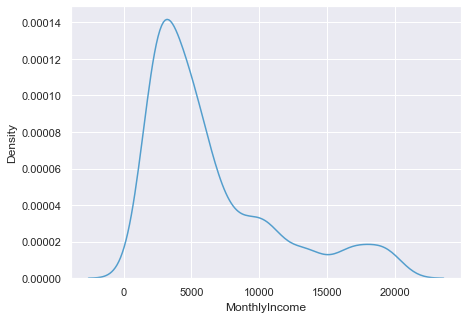

In [374]:
#MonthlyIncome
plt.figure(figsize=(7,5))
sns.distplot(df['MonthlyIncome'],hist=False, color=colr[3])
plt.show()

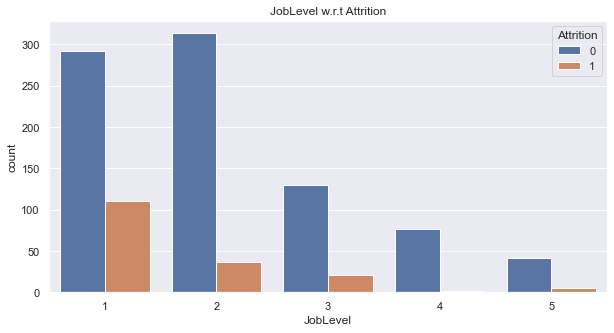

In [375]:
plt.figure(figsize=(10,5))
sns.countplot(x='JobLevel',hue='Attrition', data=df)
plt.title("JobLevel w.r.t Attrition")
plt.show()

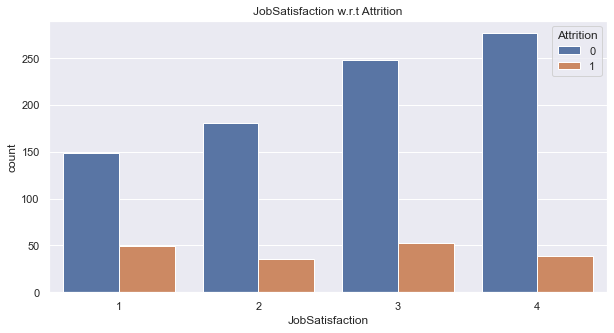

In [376]:
plt.figure(figsize=(10,5))
sns.countplot(x='JobSatisfaction',hue='Attrition', data=df)
plt.title("JobSatisfaction w.r.t Attrition")
plt.show()

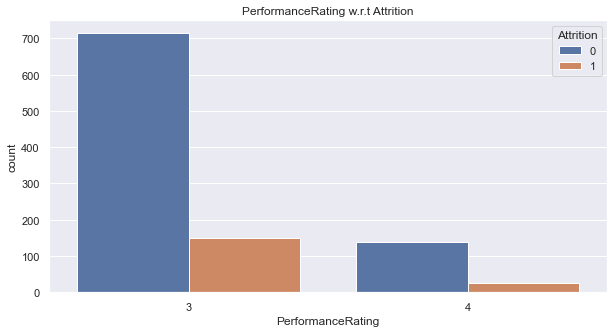

In [377]:
plt.figure(figsize=(10,5))
sns.countplot(x='PerformanceRating',hue='Attrition', data=df)
plt.title("PerformanceRating w.r.t Attrition")
plt.show()

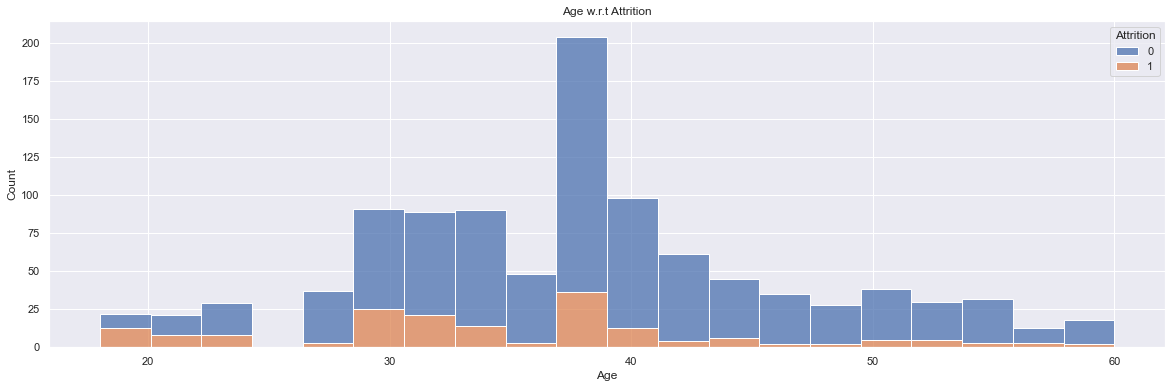

In [378]:
plt.figure(figsize=(20,6))
sns.histplot(x='Age',hue='Attrition', data=df,multiple="stack")
plt.title("Age w.r.t Attrition")
plt.show()

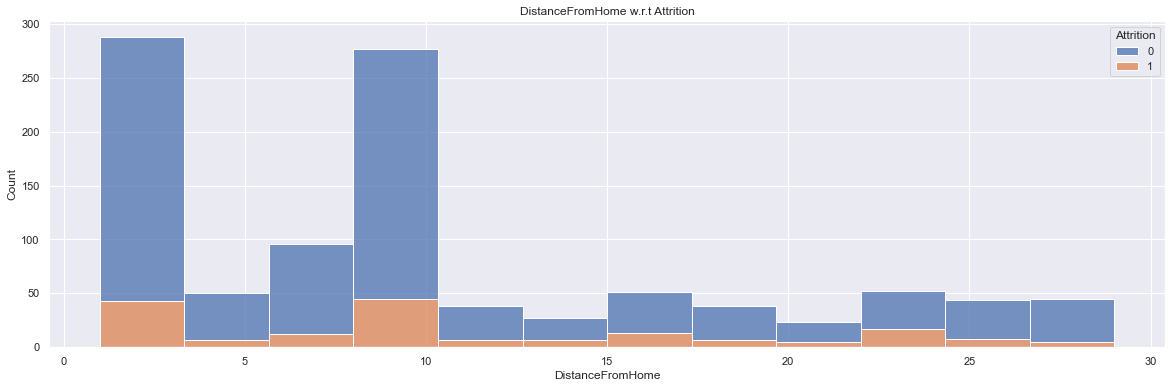

In [379]:
plt.figure(figsize=(20,6))
sns.histplot(x='DistanceFromHome',hue='Attrition', data=df,multiple="stack")
plt.title("DistanceFromHome w.r.t Attrition")
plt.show()

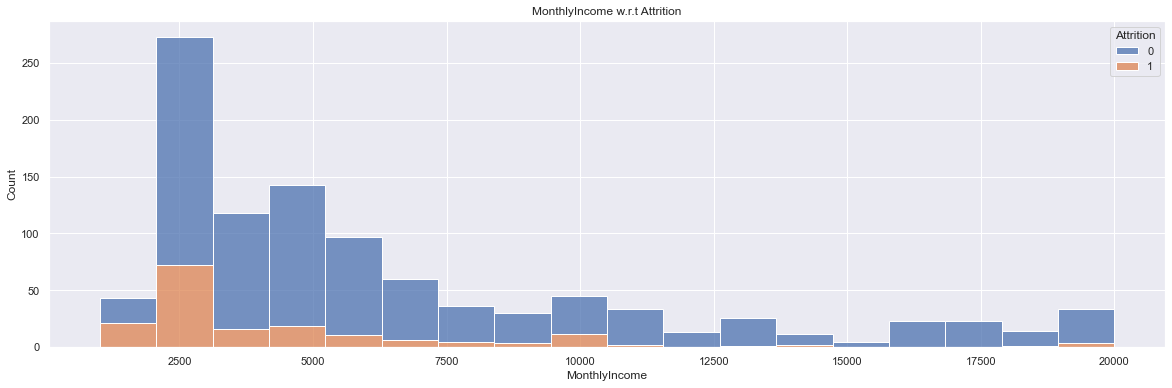

In [380]:
plt.figure(figsize=(20,6))
sns.histplot(x='MonthlyIncome',hue='Attrition', data=df,multiple="stack")
plt.title("MonthlyIncome w.r.t Attrition")
plt.show()

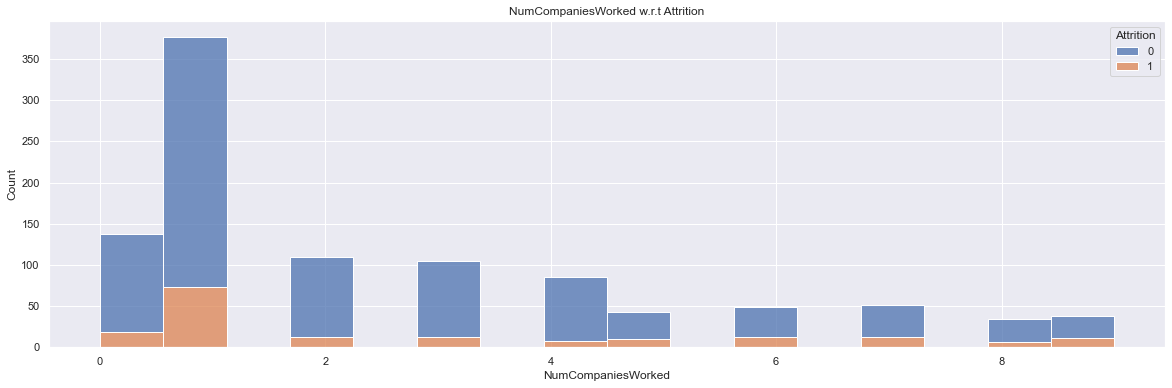

In [381]:
plt.figure(figsize=(20,6))
sns.histplot(x='NumCompaniesWorked',hue='Attrition', data=df,multiple="stack")
plt.title("NumCompaniesWorked w.r.t Attrition")
plt.show()

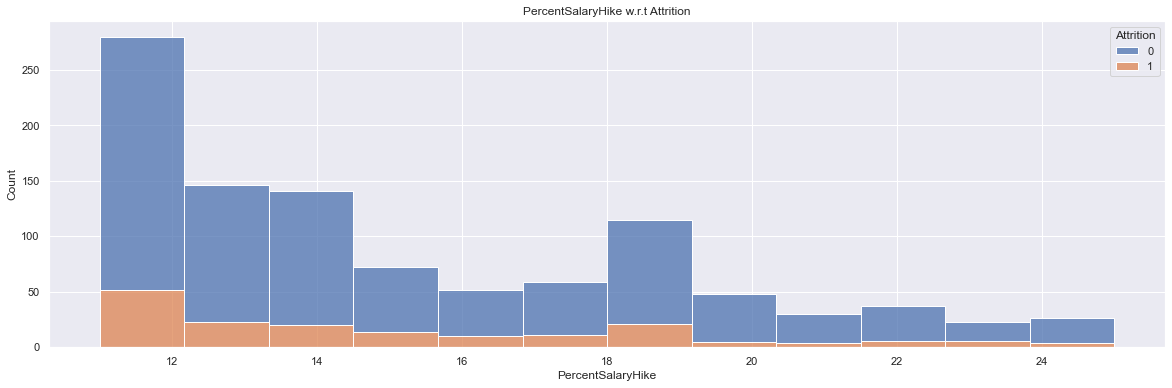

In [382]:
plt.figure(figsize=(20,6))
sns.histplot(x='PercentSalaryHike',hue='Attrition', data=df,multiple="stack")
plt.title("PercentSalaryHike w.r.t Attrition")
plt.show()

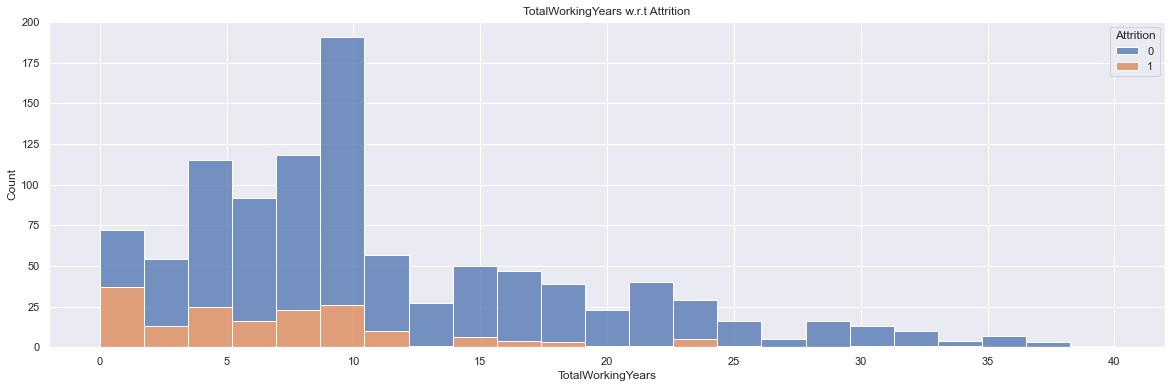

In [383]:
plt.figure(figsize=(20,6))
sns.histplot(x='TotalWorkingYears',hue='Attrition', data=df,multiple="stack")
plt.title("TotalWorkingYears w.r.t Attrition")
plt.show()

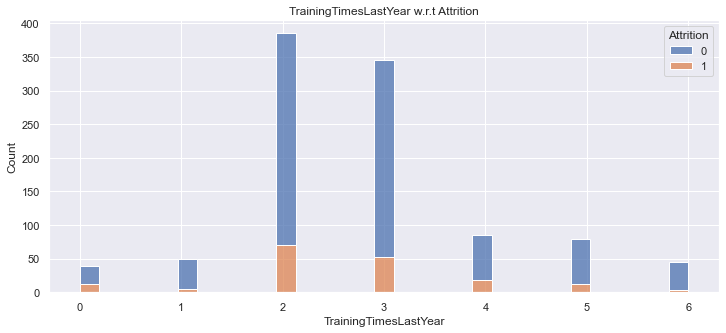

In [384]:
plt.figure(figsize=(12,5))
sns.histplot(x='TrainingTimesLastYear',hue='Attrition', data=df,multiple="stack")
plt.title("TrainingTimesLastYear w.r.t Attrition")
plt.show()

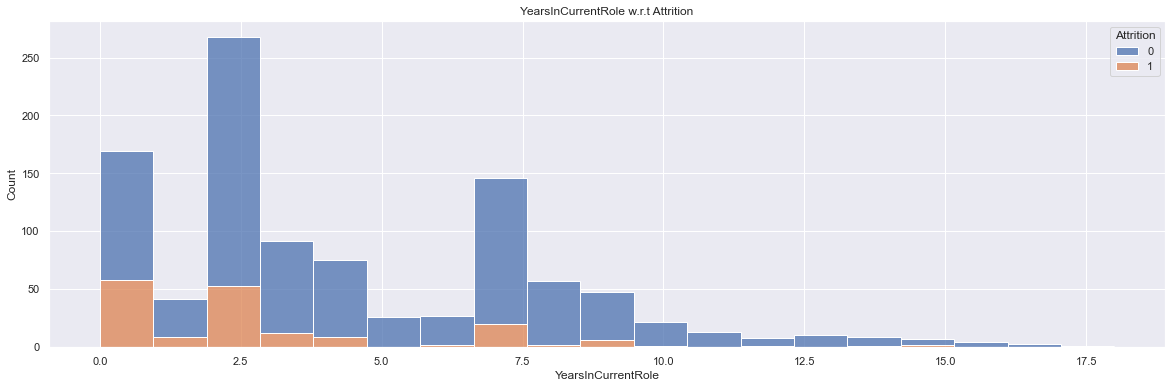

In [385]:
plt.figure(figsize=(20,6))
sns.histplot(x='YearsInCurrentRole',hue='Attrition', data=df,multiple="stack")
plt.title("YearsInCurrentRole w.r.t Attrition")
plt.show()

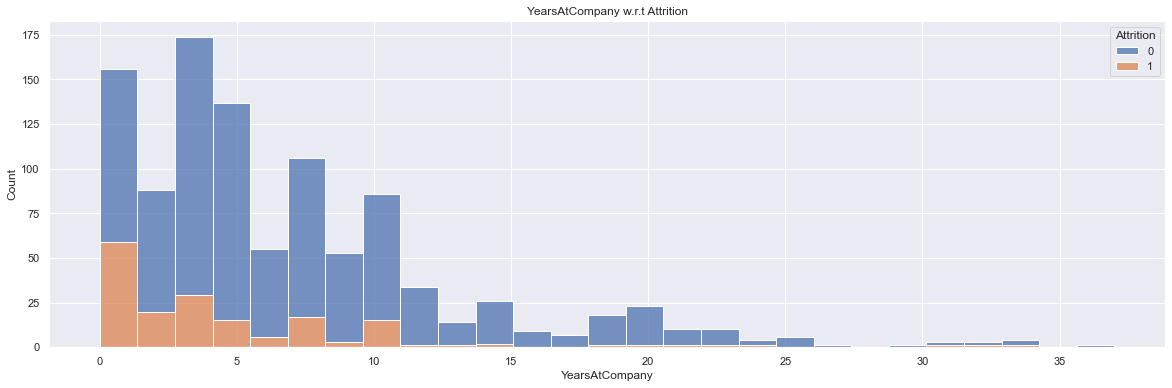

In [386]:
plt.figure(figsize=(20,6))
sns.histplot(x='YearsAtCompany',hue='Attrition', data=df,multiple="stack")
plt.title("YearsAtCompany w.r.t Attrition")
plt.show()

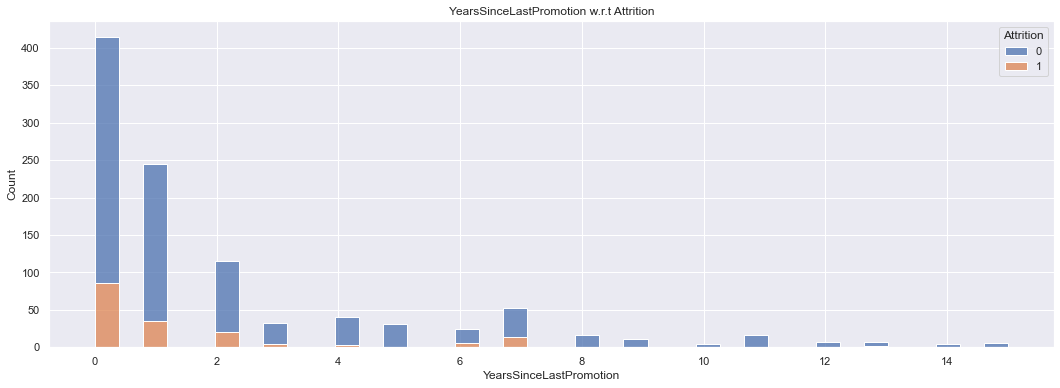

In [387]:
plt.figure(figsize=(18,6))
sns.histplot(x='YearsSinceLastPromotion',hue='Attrition', data=df,multiple="stack")
plt.title("YearsSinceLastPromotion w.r.t Attrition")
plt.show()

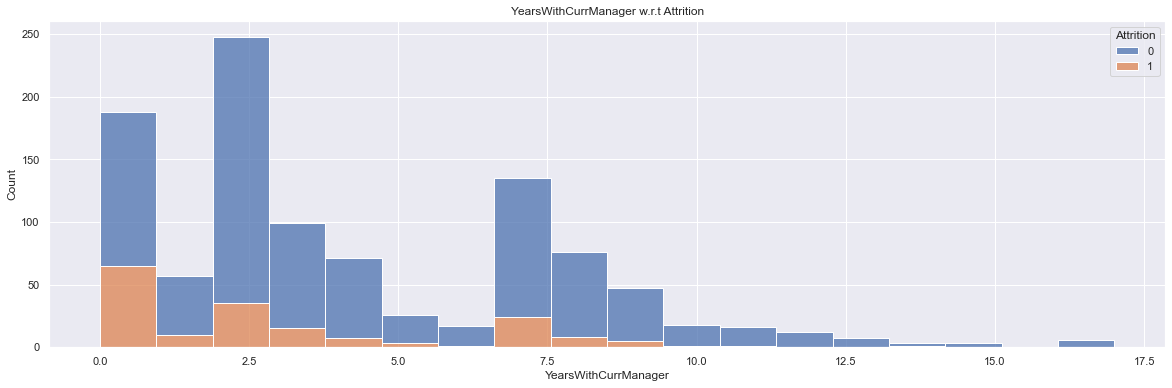

In [388]:
plt.figure(figsize=(20,6))
sns.histplot(x='YearsWithCurrManager',hue='Attrition', data=df,multiple="stack")
plt.title("YearsWithCurrManager w.r.t Attrition")
plt.show()

## Droping unnecessary columns

In [116]:
# Dropping columns with little to no useful information
df = df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis = 1)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## OBSERVATIONS

- The employees are more **who travel very rare**, and the number of **Attition of such employees are more**. It is also one reason which creates one hypothesis in mind, that these employees got less chance to outing and thus they are not comfortable with job.

- Employees **working in R&D department are more**, but employees from sales department or at position like sales executive,sale Representative leaves the job early.

- **Males** are more under Attrition then Females

- Male workers are more who do overtime.

- Employees from Bachelor are more, then from Masters background. **Attrition wrt to bachelor can be seem more** because they have more and more expectation from companies and it will be interesting to see the reason behind this in this dataset.

- Employees with **high JobInvolvement are are more under Attrition**.

- Looking at the attrition per age histogram, It's noticeable that **as employees grow old, the less they tend to leave**, and most of our employee attrition is made of employees ranging from 25 to 35 years old. If we make 2 age groups for young and old employess we will observe, who are senior, are retiring or the employees who are bachelor has more expectations more organization. The data also shows that **the more working years, more years at the company, and more years in current role employees accumulate, the less likely they are to leave**.<br><br>

- When it comes to income, **the majority of employees who have left were among those with the smaller monthly income**,  **Those who've less percent salary hike also tend to leave** more than those with a higher percentual hike in salary. <br><br>

- So mostly, **employees who leave tend to be young**, with less time working in the company and **at the beginning of their career in general**, since most of these employees were working for less than 10 years in total. <br><br>

- It's also curious to see that **a lot of these employees had less than 2 years working with their last manager**.

- OverTime has highest relationship with Attrition, **Employee who do OverTime, changes or leaves the Job early**. we have seen this above also during categorical variable analysis.


## Data of Layon Attrition

In [117]:
df11 = pd.read_csv('employee_attrition_lyon (1).csv')

In [118]:
# Dropping columns with little to no useful information
df11 = df11.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis = 1)

In [119]:
# data types of features 
df11.dtypes.value_counts()
print('Total Null values:',df11.isnull().sum().sum(),'\n')

Total Null values: 131 



In [120]:
# count of null values in columsn
for colName in df11.columns:
    nanVal = df11[colName].isna().sum()
    if nanVal > 0:
        print(colName,':',nanVal)

Age : 55
BusinessTravel : 5
DailyRate : 14
DistanceFromHome : 54
MaritalStatus : 3


In [121]:
# filling null values with mean
# Age column has the most null value so,
# filling nan with mean of column Age
AgeNanIndex = df11[df11['Age'].isna()].index
df11.loc[AgeNanIndex,'Age'] = df11['Age'].mean()

DistNanIndex = df11[df11['DistanceFromHome'].isna()].index
df11.loc[DistNanIndex,'DistanceFromHome'] = df11['DistanceFromHome'].mean()

DailyNanIndex = df11[df11['DailyRate'].isna()].index
df11.loc[DailyNanIndex,'DailyRate'] = df11['DailyRate'].mean()

In [122]:
df11copy = df11.copy()

In [123]:
# Here I will filll null for catagorical columns with the catagory with highest frequence
df11['BusinessTravel'].value_counts(),df11['MaritalStatus'].value_counts()

BuissTravNanIndex = df11[df11['BusinessTravel'].isna()].index
df11.loc[BuissTravNanIndex,'BusinessTravel'] = df11['BusinessTravel'].value_counts()[0]

MartialStatNanIndex = df11[df11['MaritalStatus'].isna()].index
df11.loc[MartialStatNanIndex,'MaritalStatus'] = df11['MaritalStatus'].value_counts()[0]

In [124]:
# One-hot encoding
df11['OverTime'] = np.where(df11['OverTime'] == "Yes",1,0)
df11['Gender'] = np.where(df11['Gender'] == "Female",1,0)

df11['BusinessTravel'],index1 = pd.factorize(df11['BusinessTravel'])
df11['Department'],index2 = pd.factorize(df11['Department'])
df11['EducationField'],index3 = pd.factorize(df11['EducationField'])
df11['JobRole'],index4 = pd.factorize(df11['JobRole'])
df11['MaritalStatus'],index5 = pd.factorize(df11['MaritalStatus'])


In [125]:
# Rescaling the data
# Scaling down the features we are able to achieve better accuracy
min_max = MinMaxScaler()

x_scaled_layon = min_max.fit(df11).transform(df11)

In [126]:
df11.head(3)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38.0,0,866.0,0,9.459948,3,0,4,0,84,...,3,4,0,6,4,3,5,4,1,3
1,53.0,0,1084.0,1,13.000000,2,0,4,1,57,...,3,3,2,5,3,3,4,2,1,3
2,24.0,0,240.0,2,22.000000,1,1,4,0,58,...,3,3,1,1,2,3,1,0,0,0


## Statistics comparison

### Stats of previous attrition

In [127]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,...,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,0.171040,0.391642,800.528942,0.383868,9.930407,2.892128,1.560739,2.683188,0.400389,...,3.159378,2.689990,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,8.752415,0.376727,0.661010,402.714749,0.564319,8.023220,1.053541,1.383425,1.096829,0.490215,...,0.366206,1.077767,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,466.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.930571,0.000000,0.000000,800.528942,0.000000,9.000000,3.000000,2.000000,3.000000,0.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1153.000000,1.000000,14.000000,4.000000,2.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1.000000,2.000000,1496.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


### Stats of Layon data

In [128]:
df11.describe()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,...,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,38.000000,0.492063,800.960187,0.741497,9.459948,2.961451,1.804989,2.811791,0.399093,64.049887,...,3.140590,2.764172,0.727891,11.473923,2.839002,2.791383,7.160998,4.260771,2.346939,4.396825
std,8.261631,0.817733,389.329022,0.536255,7.608328,0.951488,1.451668,1.080171,0.490268,19.889176,...,0.347992,1.088654,0.793936,7.603819,1.303465,0.727398,6.264541,3.542922,3.471939,3.661705
min,18.000000,0.000000,104.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,470.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,47.000000,...,3.000000,2.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,38.000000,0.000000,800.960187,1.000000,9.000000,3.000000,2.000000,3.000000,0.000000,63.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1.000000,1130.000000,1.000000,13.000000,4.000000,3.000000,4.000000,1.000000,81.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,3.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Observation
- In start I filled the NaN/Null values with mean of that column BUT we wanted  data from a previous transaction that was similar in deal value, similar in the size of shut-down, and similar in the distance of movement from the shutdown office. In stats of both the datasets there is no siginificent change. thats why we will still use mean form previous attrition

## FeatureSelection

In [129]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']

In [131]:
x.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Use RandomTree to determine most important features

In [403]:
extra_tree = ExtraTreesClassifier()

extra_tree.fit(x,y)

feat_importance = extra_tree.feature_importances_

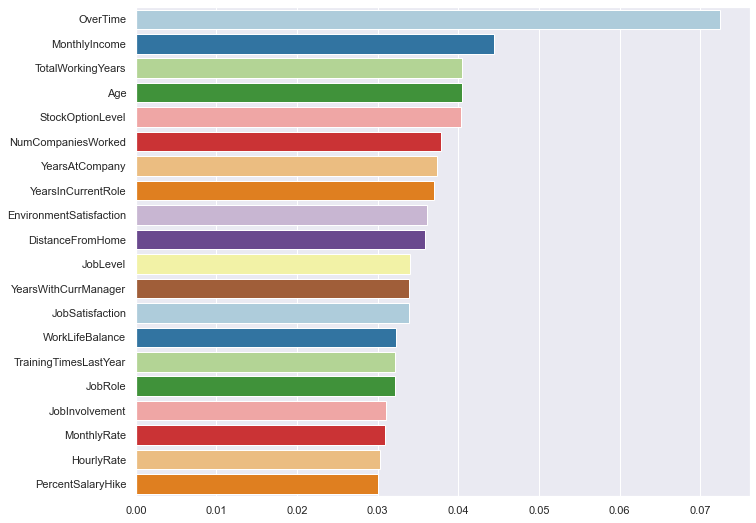

In [404]:
#plotting a feature importance
plt.figure(figsize=(11,9))
feat_imp = pd.Series(extra_tree.feature_importances_, index=x.columns)
val = feat_imp.nlargest(20).index
ind = feat_imp.nlargest(20).values
sns.barplot(ind,val, palette=sns.color_palette("Paired",as_cmap=False,n_colors=20))
plt.show()

## OBSERVATIONS: ****Factors Responsible for Employee Attrition****

- OverTime has highest relationship with Attrition, Employee who do OverTime, changes or leaves the Job early. we have seen this above also during categorical variable analysis.

- MonthlyIncome is 2nd greatest factor for employee to Attritate

- TotalWorkingYears is another factor, as we have already discussed above employees with less TotalWorkingYears tensds to Attritate more.

- StockOptionLevel and NumCompaniesWorked is at same level but still important features for Attritate.

## Model Selection

In [405]:
# Rescaling the data
# Scaling down the features we are able to achieve better accuracy
min_max = MinMaxScaler()

x_scaled = min_max.fit(x).transform(x)

In [406]:
# Split data into train and test set.
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y,test_size=0.25,random_state=42)
print("Training dataset shape: ",x_train_scaled.shape)
print("Testing dataset shape:  ",x_test_scaled.shape)

Training dataset shape:  (771, 30)
Testing dataset shape:   (258, 30)


In [407]:
# Models
log_clf = LogisticRegression()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

In [408]:
# Accuracy score on scalled dataset for above listed models
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf]:
    clf.fit(x_train_scaled, y_train_scaled)
    
    pred = clf.predict(x_test_scaled)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test_scaled,pred))

LogisticRegression   0.8682170542635659
SVC   0.8565891472868217
KNeighborsClassifier   0.872093023255814
DecisionTreeClassifier   0.7713178294573644
RandomForestClassifier   0.872093023255814


**XGBoost:** Xgboost is an extension to GBM, for better speed and performance. It is trained in additive manner. It prevents the overfitting, and outliers. for xgboost we also no need to impute missing values, it takes care of that too.  

In [409]:
# XGBOOST

# Hyper-parameters:
# objective |  reg:logistic: for logistic regression
# max_depth | depth per tree. A deeper tree might increase the performance, but also the complexity and chances to overfit.
# learning_rate | size at each iteration while your model optimizes toward its objective
# n_estimators | number of trees in our ensemble
# alpha | L1 regularization on the weights, might improve speed performances
# reg_lambda | L2 regularization on the weights, might help to reduce overfitting

xgb = XGBClassifier(objective='reg:logistic',max_depth=4,learning_rate=0.2,n_estimators=97,alpha=2,reg_lambda=10)

xgb.fit(x_train_scaled, y_train_scaled)

prediction = xgb.predict(x_test_scaled)

print("accuracy: ",accuracy_score(y_test_scaled,prediction)) #0.875968992248062 #0.8875968992248062 #0.8914728682170543 #0.8953488372093024 #0.9031007751937985

accuracy:  0.9031007751937985


## OBSERVATIONS

- By trying different **Machine Learning model** and observing there score **Logistic Regression was the best match**.
- When VotingClassifier was used to predicts on the basis of aggregating of each base estimator the **Accuracy achived was %86**
- XGBoost classifier gave the highest accuracy score so it's the final model chosen for probability prediction

## Prediction on Layon Attrition

In [410]:
ProbPred = pd.DataFrame(xgb.predict_proba(x_scaled_layon),columns=['Prob (stay)','Prob (take RCC)'])
ProbPred['Prediction'] = xgb.predict(x_scaled_layon)
# ProbPred['TrueTarget'] = y

In [411]:
ProbPred.head()

,Prob (stay),Prob (take RCC),Prediction
0,0.957980,0.042020,0
1,0.975867,0.024133,0
2,0.799040,0.200960,0
3,0.979923,0.020077,0
4,0.955683,0.044317,0


In [412]:

df11copy['Prob (stay)'] = ProbPred['Prob (stay)']
df11copy['Prob (take RCC)'] = ProbPred['Prob (take RCC)']
df11copy['Prediction'] = ProbPred['Prediction']

In [413]:
df11copy.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Prob (stay),Prob (take RCC),Prediction
0,38.0,Travel_Rarely,866.0,Sales,9.459948,3,Medical,4,Male,84,...,6,4,3,5,4,1,3,0.957980,0.042020,0
1,53.0,Travel_Rarely,1084.0,Research & Development,13.000000,2,Medical,4,Female,57,...,5,3,3,4,2,1,3,0.975867,0.024133,0
2,24.0,Travel_Rarely,240.0,Human Resources,22.000000,1,Human Resources,4,Male,58,...,1,2,3,1,0,0,0,0.799040,0.200960,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.000000,3,Life Sciences,2,Male,59,...,25,2,3,1,0,0,0,0.979923,0.020077,0
4,36.0,Travel_Rarely,1396.0,Research & Development,9.459948,2,Life Sciences,4,Male,62,...,16,3,4,13,11,3,7,0.955683,0.044317,0


## Observing Model prediction on Layon Attrition dataset

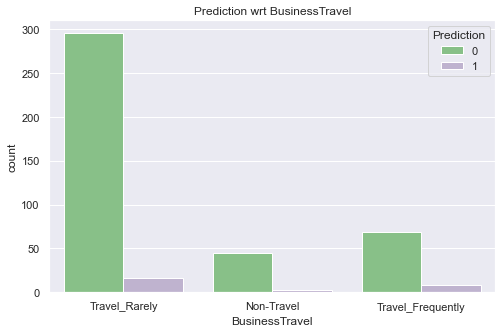

In [414]:
plt.figure(figsize=(8,5))
sns.countplot(x='BusinessTravel',hue='Prediction', data=df11copy, palette='Accent' )
plt.title("Prediction wrt BusinessTravel")
plt.show()

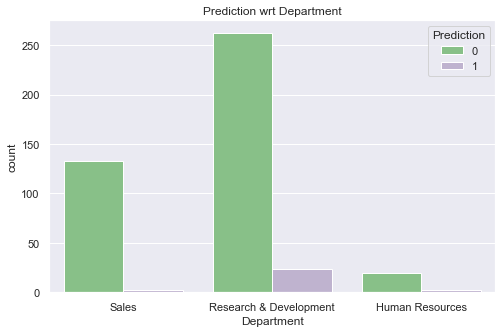

In [415]:
plt.figure(figsize=(8,5))
sns.countplot(x='Department',hue='Prediction', data=df11copy, palette='Accent' )
plt.title("Prediction wrt Department")
plt.show()

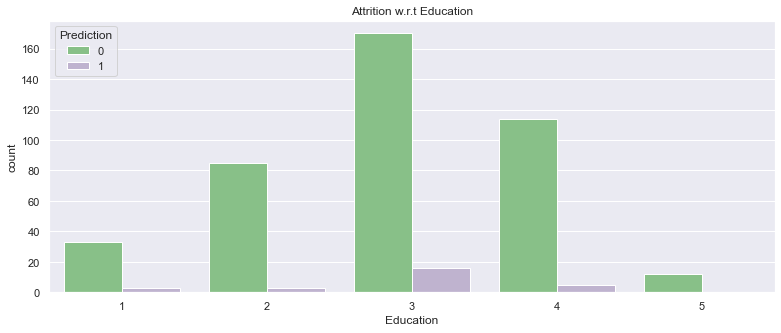

In [416]:
plt.figure(figsize=(13,5))
sns.countplot(x='Education',hue='Prediction', data=df11copy, palette='Accent')
plt.title("Attrition w.r.t Education")
plt.show()

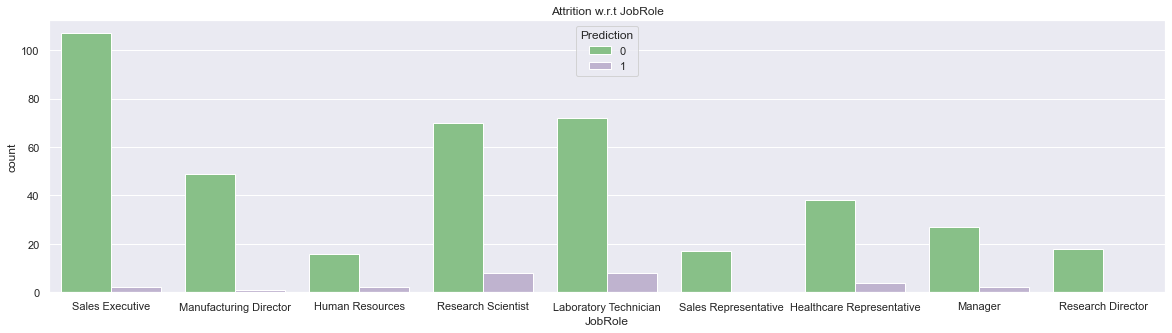

In [417]:

plt.figure(figsize=(20,5))
sns.countplot(x='JobRole',hue='Prediction', data=df11copy, palette='Accent')
plt.title("Attrition w.r.t JobRole")
plt.show()

# Question 2
Formulate the problem outlined in Part C of the case as an optimization problem. Be 
sure to clarify what are the key elements of the problem as learned in class

## Formulating Problem
- We have have designed a Machine Learning model who predicts the probability for employe-level weather they will or will not accept RCC.
- Now we need to optimize it in such a way they we select employee categories that have on average highest probability of leaving.
- Selection should be objective and doesn't target people on  gender or only selects 1 to 2 employee per category. In short no discrimination o individual level.

### Objective:
- Minimize severanc packages cost


### Decission variable
- Chose employe at category or job role level

### Constraint
- Only 40 employees can be chosen
- Chosen employees are spread across job roles
- Don't chose too many employees form one job role
- No discrimination on individual level OR don't target people basedon attributes

# Question 3
 Open Starting_model.xlsx. Each employee is given with a probability of accepting an RCC 
(please use this probability, not the one you predicted). Determine employee 
categories which may or may not be opened up to RCCs. In the xlsx file, employees 
have been assigned at random to placeholder categories - make sure to overwrite the 
group assignments based on your choices and modify the optimization problem 
accordingly. Moreover, make sure to justify your choice of employee categories, 
especially in light of possible discrimination issues


### Group 1
**Following are the attributes on which RCC is offered to this group and is accepted:**
- Employee who rarely went on a business trip 
- Employee doing Over-Time 
- Marital Status\
These are the employees who are putting extra hours at work and havent' travelled much. if we observe people who are single and married are accepting RCC. So, Chances are they will accept RCC to take a break if married or find a new opportunity if single.

In [418]:
df.groupby('Attrition')['OverTime','BusinessTravel'].value_counts()

Attrition  OverTime  BusinessTravel
0          0          0                460
           1          0                144
           0          1                114
                      2                 76
           1          1                 36
                      2                 18
           0         -1                  4
           1         -1                  1
1          1          0                 69
           0          0                 50
           1          1                 26
           0          1                 23
                      2                  4
           1          2                  4
dtype: int64

In [419]:
df.groupby('Attrition')['OverTime','MaritalStatus'].value_counts()

Attrition  OverTime  MaritalStatus
0          0          2               314
                      1               179
                      0               157
           1          2                99
                      0                54
                      1                46
           0         -1                 4
1          1          1                55
           0          1                40
           1          2                33
           0          2                28
           1          0                10
           0          0                 9
           1         -1                 1
dtype: int64

In [420]:
# index after applying filter
i1 = (df11copy['OverTime'] == 'Yes') & (df11copy['BusinessTravel'] == 'Travel_Rarely') & ((df11copy['MaritalStatus'] == 'Single') | ((df11copy['MaritalStatus'] == 'Married')))
i1ind = df11copy[i1].index
len(i1ind)

54

### Group 2
**Following are the attributes on which RCC is not offered to this group and must stay:**
- JobInvolvement: These employees show more intrest, so its not good to loose them
- The employees wih higher performance rating should stay in the company

In [421]:
df11copy.groupby('JobInvolvement')['PerformanceRating'].value_counts()

JobInvolvement  PerformanceRating
1               3                     20
                4                      3
2               3                     91
                4                     15
3               3                    226
                4                     36
4               3                     42
                4                      8
Name: PerformanceRating, dtype: int64

In [422]:
# index after applying filter
i2 = (df11copy['JobInvolvement'] == 4) &  (df11copy['PerformanceRating'] == 4) 
i2ind = df11copy[i2].index 
len(i2ind)

8

### Group 3
**Following are the attributes on which RCC is offered to this group:**\
These employees with low Job Level in JobRole (Research Scientist, Laboratory Technician,Sales Executive) should be offered with rcc.
The employees with low Work Life Balance and employees with more then 5 years in current job role should also be offered with rcc because they might not help in company growth and might effect there career as well.

In [423]:
df11copy['JobLevel'].value_counts()

2    184
1    140
3     67
4     28
5     22
Name: JobLevel, dtype: int64

In [424]:
df11copy.groupby('WorkLifeBalance')['JobRole'].value_counts()


WorkLifeBalance  JobRole                  
1                Sales Executive               7
                 Laboratory Technician         5
                 Healthcare Representative     4
                 Research Scientist            4
                 Manufacturing Director        3
                 Human Resources               1
                 Manager                       1
                 Research Director             1
2                Sales Executive              23
                 Research Scientist           19
                 Laboratory Technician        16
                 Manufacturing Director       11
                 Manager                       9
                 Healthcare Representative     8
                 Sales Representative          4
                 Human Resources               3
                 Research Director             1
3                Sales Executive              64
                 Research Scientist           49
                 Laborator

In [425]:
df11copy.groupby('JobLevel')['JobRole'].value_counts()


JobLevel  JobRole                  
1         Laboratory Technician        59
          Research Scientist           56
          Sales Representative         17
          Human Resources               8
2         Sales Executive              77
          Manufacturing Director       34
          Healthcare Representative    24
          Research Scientist           21
          Laboratory Technician        20
          Human Resources               8
3         Sales Executive              28
          Healthcare Representative    14
          Manufacturing Director       12
          Research Director             6
          Manager                       3
          Human Resources               2
          Laboratory Technician         1
          Research Scientist            1
4         Manager                       9
          Research Director             7
          Healthcare Representative     4
          Manufacturing Director        4
          Sales Executive               

In [426]:
# index after applying filter
i3 = (df11copy['JobLevel'] <= 2) &  (df11copy['WorkLifeBalance'] <= 2) &  (df11copy['YearsInCurrentRole'] >= 5)
i3ind = df11copy[i3].index 
len(i3ind)

23

### Group 4
**Following are the attributes on which RCC is offered to this group:**\
The employees with less then 3 years since last promotion and less then 5 years of work with same manager tend to accept rcc

In [427]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [428]:
# index after applying filter
i4 = (df11copy['YearsSinceLastPromotion'] <= 3) &  (df11copy['YearsWithCurrManager'] <= 5) & (df11copy['NumCompaniesWorked'] <= 3) & (df11copy['DistanceFromHome'] >= 20) 
i4ind = df11copy[i4].index 
len(i4ind)

24

## Main Solver sheet

In [461]:
new = pd.read_csv('new.csv')

In [462]:
new['Group1'] = np.zeros(441)
new.loc[i1ind,'Group1'] = 1

new['Group2'] = np.zeros(441)
new.loc[i2ind,'Group2'] = 1

new['Group3'] = np.zeros(441)
new.loc[i3ind,'Group3'] = 1

new['Group4'] = np.zeros(441)
new.loc[i4ind,'Group4'] = 1


In [463]:
new['RCC offered'] =  np.zeros(441)
new['Must stay on'] =  np.zeros(441)

for i in new.index:
    if new.loc[i,'Group1']==1 or new.loc[i,'Group3']==1 or new.loc[i,'Group4']==1 or new.loc[i,'Group5']==1:
        new.loc[i,'RCC offered'] =1
    else:
        new.loc[i,'Must stay on']=1

In [464]:
new.sum()

Take RCC         66.1787
stay Prob       374.8213
Group5           59.0000
Group1           54.0000
Group2            8.0000
Group3           23.0000
Group4           24.0000
RCC offered     141.0000
Must stay on    300.0000
dtype: float64

In [465]:
new['Severance Package'] = np.zeros(441)

for i in df11copy.index:
    yr = df11copy.loc[i,'YearsAtCompany']
    monSal = df11copy.loc[i,'MonthlyIncome']
    if yr >10:
        new.loc[i,'Severance Package'] = (yr)*monSal
    else:
        new.loc[i,'Severance Package'] = (yr)*monSal


In [141]:
df11copy.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [140]:
df11copy['YearsAtCompany'].unique()

array([ 5,  4,  1, 13,  8,  3, 19, 21,  7,  9, 17, 10, 14,  2, 36, 11,  6,
       20, 15, 12,  0, 24, 18, 27, 16, 22, 29, 25, 33, 26, 34, 23, 30, 40],
      dtype=int64)

0.3333333333333333

In [139]:
3*0.3

0.8999999999999999

In [138]:
3294*(3*0.3)

2964.6

In [466]:
new.head()

,Take RCC,stay Prob,Group5,Group1,Group2,Group3,Group4,RCC offered,Must stay on,Severance Package
0,0.037895,0.962105,0,0.0,0.0,0.0,0.0,0.0,1.0,42315.0
1,0.003031,0.996969,0,0.0,0.0,0.0,0.0,0.0,1.0,17800.0
2,0.307856,0.692144,0,0.0,0.0,0.0,1.0,1.0,0.0,1555.0
3,0.004300,0.995700,0,0.0,0.0,0.0,0.0,0.0,1.0,9724.0
4,0.022942,0.977058,0,0.0,0.0,0.0,0.0,0.0,1.0,76882.0


In [468]:
new.to_excel('MySolver.xlsx')